# VISA CASE STUDY

### Problem Statement:
><b>How would you determine if a specific block in your neighborhood is suitable for a new grocery store?

***

The following Notebook is an attempt to acheive the following:<br>
1. Frame the above problem coherently
2. Use Analyses techniques on the data
3. Leverage the results and findings to suggest possible solutions/insights
4. Discuss potential limitations of the approach

A proposal is provided in the README covering the below points:
<br>

1. Assumptions - To frame the problem
2. Analysis Methodology - To explain your analysis approach and chosen analytics techniques
3. Expected Results and Findings
4. Recommendations – Based on expected results and findings
5. Potential Limitations inherent in the approach
***

### Framing the Problem

We are analyzing the pros and cons of choosing a specific neighbourhood block as the site for our grocery stores.<br>
I have very originally chosen to name our potential store ASIV.<br>
Let us lay some base assumptions and groundwork for the analyses that will be carried out.<br>
***
1. The location is chosen as the block around <b>Baker and Fulton Street</b>, located in the North of Panhandle region of San Francisco. (This location was chosen because I recently noticed a popular Chilis pie shop permanently close at that location :( )
2. Factors that we will be considering in this case study:
<b><br>
 a. Security<br>
 b. Population demographics around the block<br>
 c. Accessibility <br>
 d. Types of nearby businesses<br>
</b><br>
There are of couse other factors, such as type and goods of our store, import costs etc which can be considered in successive studies.

## Exploratory Analysis

### Security

Lets start with our first area of concern which is the security in the area.<br><br>
>Assuming most people aren't very likely to shop for groceries in parts of town more notorious for criminal offenses. A prime factor that affects our decision for the grocery shops is the security in the area. 

#### Acquiring the data

Fortunately, San Francisco has a public repository of city data related to Transportaion, City Infrastructure and yes <b> Public Safety</b> avaliable at:<br>
>https://datasf.org<br>
>https://data.sfgov.org/Public-Safety/Police-Department-Incidents-Current-Year-2018-/956q-2t7k

I've chosen police department incidents for the year of 2018 so far.

Handling Imports

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
crime_df = pd.read_csv('Police_Department_Incidents_-_Current_Year__2018_.csv')

In [32]:
crime_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,189014013,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Monday,01/01/2018,22:37,TARAVAL,"ARREST, BOOKED",3500 Block of 19TH AV,-122.474829,37.723976,"(37.723975823482135, -122.47482947577244)",18901401371024
1,186095971,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Monday,01/01/2018,08:00,TENDERLOIN,NONE,500 Block of EDDY ST,-122.416711,37.783357,"(37.78335703909351, -122.41671073384802)",18609597119050
2,186084021,FRAUD,"CREDIT CARD, THEFT BY USE OF",Monday,01/01/2018,00:01,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223,37.781896,"(37.78189594886033, -122.42822330317604)",18608402109320
3,186072593,NON-CRIMINAL,LOST PROPERTY,Monday,01/01/2018,17:00,MISSION,NONE,2100 Block of MARKET ST,-122.429789,37.766652,"(37.766652147476215, -122.4297889869883)",18607259371000
4,186063279,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,01/01/2018,22:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.40340479147905)",18606327906244


In [33]:
crime_df.shape

(46668, 13)

In [34]:
crime_df.describe()

,IncidntNum,X,Y,PdId
count,4.666800e+04,46668.000000,46668.000000,4.666800e+04
mean,1.813598e+08,-122.423404,37.769032,1.813598e+13
std,2.974998e+06,0.025635,0.023854,2.974998e+11
min,1.802993e+07,-122.513642,37.707922,1.802993e+12
25%,1.801110e+08,-122.433111,37.756486,1.801110e+13
50%,1.802233e+08,-122.417145,37.775421,1.802233e+13
75%,1.803351e+08,-122.406978,37.785151,1.803351e+13
max,3.860343e+08,-122.365241,37.819923,3.860343e+13


In [35]:
crime_df.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

Lets look at the object types

In [36]:
crime_df.describe(include=[np.object])

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Location
count,46668,46668,46668,46668,46668,46668,46668,46668,46668
unique,37,590,7,135,1422,10,9,10215,11240
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/01/2018,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,"(37.775420706711, -122.40340479147905)"
freq,13632,6256,7144,453,1171,8577,34509,1041,1035


>To better understand our data, lets first look at the <b>Category</b> and <b>PdDistrict</b> features, as they seem relevant to crime and location information.

The data appears to be pretty clean, with no missin values!

In [37]:
category_counts = crime_df.Category.value_counts()
district_counts = crime_df.PdDistrict.value_counts()

#### Visualizing the crime category and the district counts

In [38]:
def make_bar_plot(x,y, palette,xlabel,ylabel):
    fig,axs = plt.subplots(figsize = (10,10))

    sns.barplot(x = x,
                y = y,
                palette = palette
               )

    axs.set(xlabel = xlabel, ylabel = ylabel)

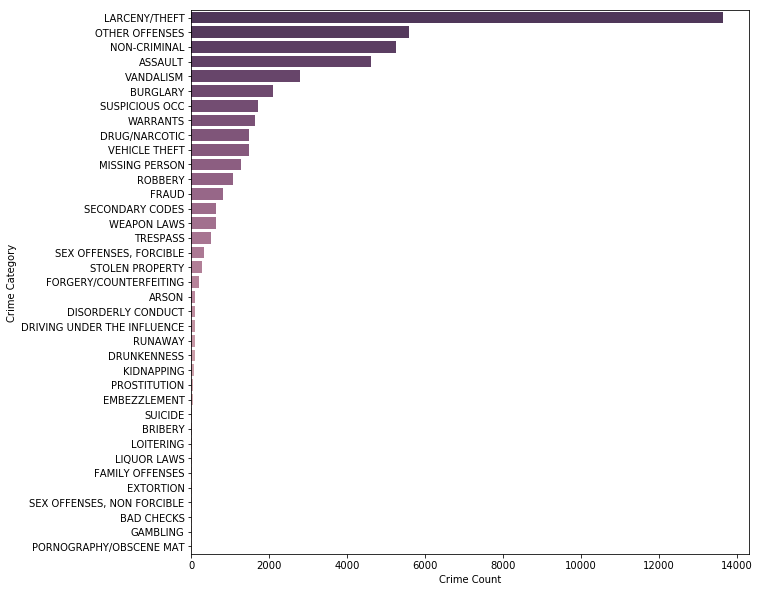

In [39]:
make_bar_plot(category_counts,
             category_counts.index,
             sns.cubehelix_palette(len(category_counts),dark=0.25, light=0.9,reverse=True),
             'Crime Count',
             'Crime Category')

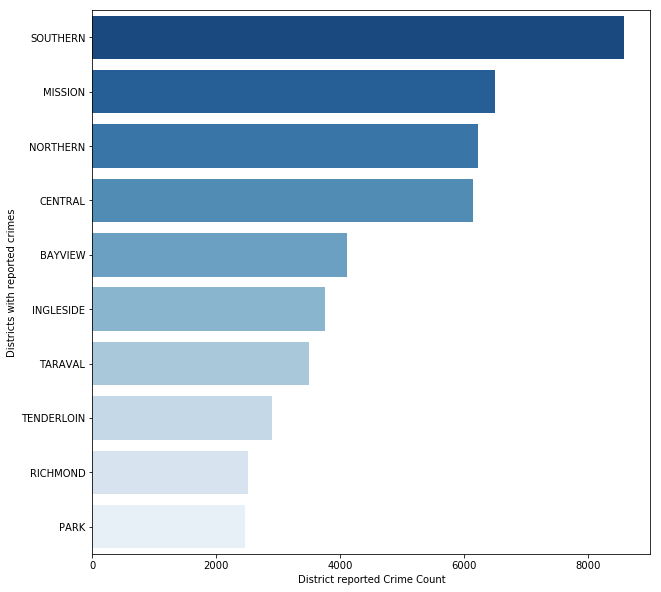

In [166]:
make_bar_plot(district_counts,district_counts.index,
             'Blues_r',
             'District reported Crime Count',
             'Districts with reported crimes')

The following observations can be made from the above two visualizations:<br>
1. The most common crimes are Theft, Non criminal and Other offenses(which are slightly ambiguous), Assault, Vandalism and Burglary. <br> All of these (excluding the ambiguous ones) are a source of concern while opening a grocery shop in the area.<br><br>
2. Most number of crimes occured in the Southern district. Luckily our location is in the Park District, which has the lowest crime rates.

A better indication would be to look at the distress calls which were made from the Park district. We do this in the next few lines of code.

In [41]:
park_crimes_df = crime_df.loc[crime_df['PdDistrict']=='PARK',['PdDistrict','Category']]
park_crimes_df.head()

,PdDistrict,Category
6,PARK,LARCENY/THEFT
8,PARK,LARCENY/THEFT
22,PARK,LARCENY/THEFT
33,PARK,OTHER OFFENSES
77,PARK,VANDALISM


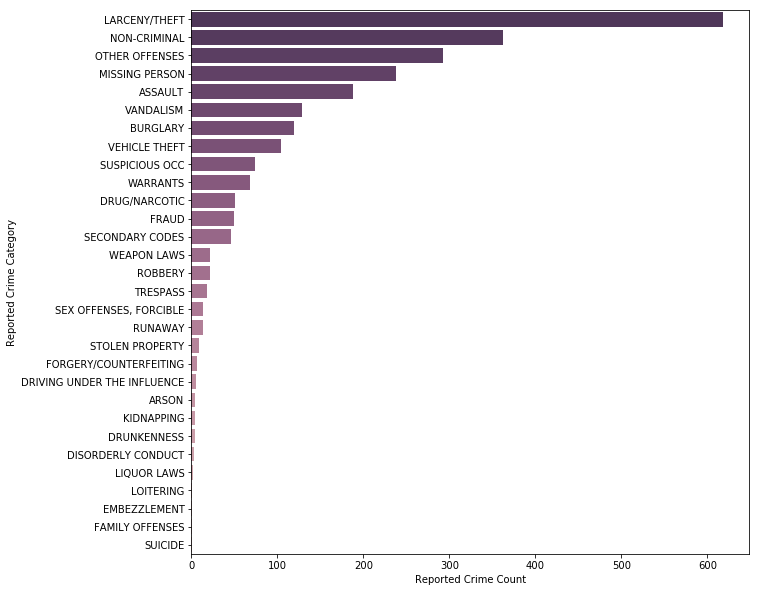

In [167]:
make_bar_plot(park_crimes_df.Category.value_counts(),
             park_crimes_df.Category.value_counts().index,
             sns.cubehelix_palette(len(category_counts),dark=0.25, light=0.9,reverse=True),
             'Reported Crime Count',
             'Reported Crime Category')

The most frequent complaints remain more of less similar to the overall complaints.

Out of curiosity I located our 'potential' grocery store on a map of the disctricts in SF, provided by SF Police Department, the image is shown below.

<img src='SF_District.png' width = '500px',height='500px' alt='SF_Ditrict'>
<div align ='center'> Store Location</div>

As seen from the image, our store is on the edge of PARK and NORTHERN districts.<br> A better approach would be to locate distress call locations using the geographical co-ordinates in the original data set. Lets do that next.

The latitude and longitude of our store are :<b> -122.441534, 37.776466</b>
We'll choose locations that are within 0.001 or our store location, which is roughly a two block distance

In [43]:
store_vicinity = crime_df.loc[(crime_df.X>-122.442) & (crime_df.X<-122.440 )
                               &(crime_df.Y<37.777) & (crime_df.Y>37.775), ['Category','PdDistrict','Address','Descript']]

In [63]:
store_vicinity.head()

,Category,PdDistrict,Address,Descript
2407,ASSAULT,PARK,1400 Block of GROVE ST,BATTERY
13008,WARRANTS,PARK,GROVE ST / BAKER ST,ENROUTE TO OUTSIDE JURISDICTION
13508,LARCENY/THEFT,PARK,400 Block of BAKER ST,PETTY THEFT OF PROPERTY
15323,MISSING PERSON,PARK,400 Block of BAKER ST,FOUND PERSON
15324,MISSING PERSON,PARK,400 Block of BAKER ST,MISSING ADULT


Looking at the description for a missing person report reveals that, when a missing person is found, it's still categorised as a missing person report. Let's remove those from our consideration.

In [64]:
store_vicinity = store_vicinity[store_vicinity.Descript!='FOUND PERSON']

In [65]:
store_vicinity.PdDistrict.value_counts()

PARK    25
Name: PdDistrict, dtype: int64

The above code shows that all of the distress calls in the vicinity were from the PARK district.

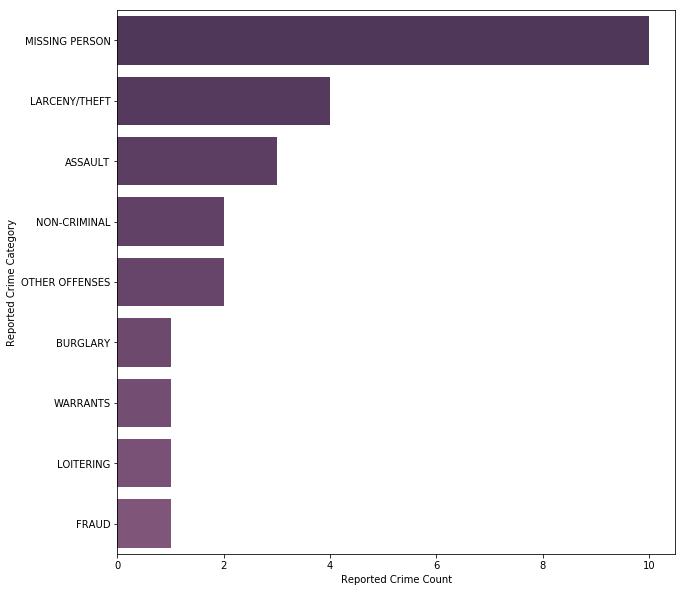

In [168]:
make_bar_plot(store_vicinity.Category.value_counts(),
              store_vicinity.Category.value_counts().index,
              sns.cubehelix_palette(len(category_counts),dark=0.25, light=0.9,reverse=True),
              'Reported Crime Count',
              'Reported Crime Category')

>The total distress call count was 25 in the immediate vicinity of our store location,which looks to be a good sign!<br> (Taking into account the total 46,668 total distress calls placed in 2018.)

Comparing with a value in the Southern District where reported crimes were the highest
37.776393, -122.408464 Langdon and Folsom street

In [67]:
south_vicinity = crime_df.loc[(crime_df.X>-122.409) & (crime_df.X<-122.407 )
                               &(crime_df.Y<37.777) & (crime_df.Y>37.775), ['Category','PdDistrict','Address','Descript']]

In [70]:
south_vicinity = south_vicinity[south_vicinity.Descript!='FOUND PERSON']

In [72]:
south_vicinity.head()

,Category,PdDistrict,Address,Descript
1087,LARCENY/THEFT,SOUTHERN,7TH ST / FOLSOM ST,GRAND THEFT FROM LOCKED AUTO
3756,VANDALISM,SOUTHERN,7TH ST / FOLSOM ST,"MALICIOUS MISCHIEF, VANDALISM"
4599,LARCENY/THEFT,SOUTHERN,300 Block of 7TH ST,PETTY THEFT OF PROPERTY
4929,VANDALISM,SOUTHERN,1000 Block of FOLSOM ST,"MALICIOUS MISCHIEF, TIRE SLASHING"
4973,NON-CRIMINAL,SOUTHERN,1100 Block of FOLSOM ST,AIDED CASE


In [71]:
south_vicinity.PdDistrict.value_counts()

SOUTHERN    49
Name: PdDistrict, dtype: int64

>We see that there are double the number of distress calls made in a Southern District location.

## Population Demographics

I am using the 2010 Census data for this part of the analysis.<br>
The data can be found at the census.gov website. Although a better formatted subset with median household income can be found on:
>https://datausa.io/profile/geo/san-francisco-ca/

The dataset provides the median Household Income for various locations around the city. Let's take a look at the data

In [172]:
pop_df = pd.read_csv('GeoMapIncomeLocation.csv')

In [173]:
pop_df.head()

,year,geo_name,geo,income
0,2016,Census Tract 264.01,14000US06075026401,50694.0
1,2013,Census Tract 264.01,14000US06075026401,46514.0
2,2014,Census Tract 264.01,14000US06075026401,45451.0
3,2015,Census Tract 264.01,14000US06075026401,46150.0
4,2016,Census Tract 611,14000US06075061100,17218.0


In [175]:
pop_df.shape

(788, 4)

As we can see the locations are identified by tract names<br>
After digging a bit through the census.gov, I found a map indentifying the various tracts on a map.<br>
The original Image can be found at:<br>
>https://www2.census.gov/geo/maps/dc10map/tract/st06_ca/c06075_san_francisco/DC10CT_C06075_004.pdf

<img src='tract_locations.png' width = '500px',height='500px' alt='SF_Ditrict'>
<div align ='center'> Tract Locations</div>

The tracts which are located near our grocery store include:<br>
164, 165, 157, 158.02, 158.01

In [176]:
local_pop_df = pop_df[pop_df['geo_name'].str.contains('164|165|157|158.01|158.02')]

In [177]:
local_pop_df

,year,geo_name,geo,income
280,2016,Census Tract 158.01,14000US06075015801,66698.0
281,2013,Census Tract 158.01,14000US06075015801,61500.0
282,2014,Census Tract 158.01,14000US06075015801,72568.0
283,2015,Census Tract 158.01,14000US06075015801,71339.0
360,2016,Census Tract 164,14000US06075016400,107254.0
361,2013,Census Tract 164,14000US06075016400,76798.0
362,2014,Census Tract 164,14000US06075016400,84353.0
363,2015,Census Tract 164,14000US06075016400,86536.0
364,2016,Census Tract 157,14000US06075015700,102152.0
365,2013,Census Tract 157,14000US06075015700,82759.0


In [186]:
local_pop_df.dtypes

year         int64
geo_name    object
geo         object
income      object
dtype: object

This gives us a dataset with the year and median household income for our tracts of interest

In [193]:
local_pop_df = local_pop_df.astype({'year':'int64','income':'float64'})

In [194]:
local_pop_df.dtypes

year          int64
geo_name     object
geo          object
income      float64
dtype: object

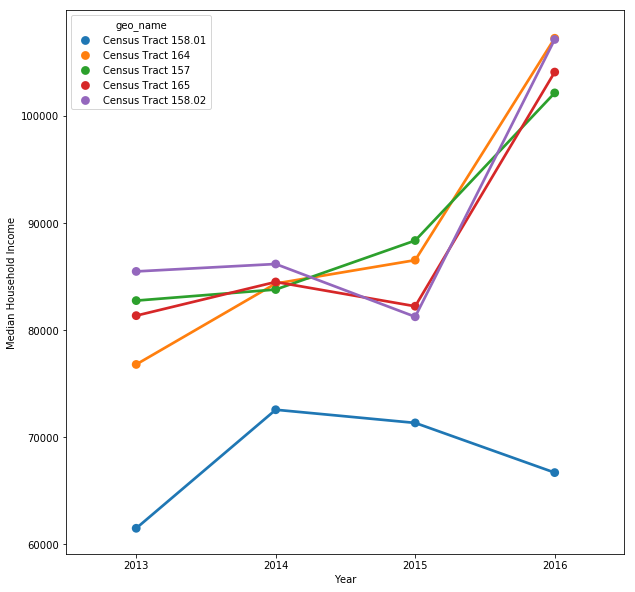

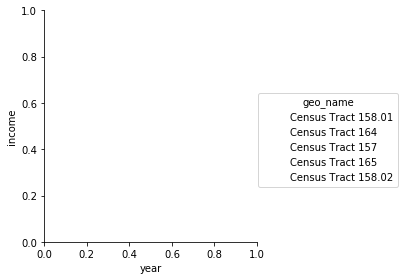

In [224]:
fig, axs = plt.subplots(figsize=(10,10))
sns.factorplot(data = local_pop_df, x = 'year', y = 'income',hue='geo_name',ax = axs)
axs.set(xlabel = 'Year',ylabel = 'Median Household Income')

## Types of Nearby Businesses

The types of businesses in the vicinity can have a huge impact on our grocery store.

In [121]:
business_df = pd.read_csv('Registered_Business_Locations_-_San_Francisco.csv')

In [122]:
business_df.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0376718-03-001,376718,Chan Renee W,Blossoming Lotus Acupuncture,2670 Leavenworth St A,San Francisco,CA,94109.0,01/28/2010,NaN,...,6100-6299,Private Education and Health Services,False,False,NaN,NaN,2.0,North Beach,NaN,"2670 LEAVENWORTH ST\nA San Francisco, CA 94109\n"
1,0474285-05-001,474285,Pressed Juicery Inc,Pressed Juicery,550 Gene Friend Way,San Francisco,CA,94158.0,12/01/2012,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,6.0,Mission Bay,NaN,"550 GENE FRIEND WAY\nSAN FRANCISCO, CA 94158\n..."
2,0474285-06-001,474285,Pressed Juicery Inc,Pressed Juicery,865 Market St #9001,San+francisco,CA,94103.0,12/01/2012,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,NaN,NaN,NaN,"865 MARKET ST\nSAN FRANCISCO, CA 94103\n(37.78..."
3,1045798-12-151,1021444,Benhammou Ahmida,Zaalouk Market & Deli Grocery,1209 Sutter St,San Francisco,CA,94109.0,12/01/2015,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,3.0,Nob Hill,NaN,"1209 SUTTER ST\nSAN FRANCISCO, CA 94109\n(37.7..."
4,1170655-12-171,1080758,San Francisco Security Services Llc,San Francisco Security Services Llc,588 Sutter St,San Francisco,CA,94102.0,12/01/2017,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN


Let's first extract the data associated with our grocery store zipcode which is 94117

In [123]:
business_df = business_df[business_df['Source Zipcode'] == 94117.0]

In [125]:
business_df.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
9,1173616-12-171,1081188,Ariel Sultan,Ariel Sultan,180 Carl St Apt 1,San Francisco,CA,94117.0,12/27/2017,NaN,...,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Haight Ashbury,NaN,NaN
22,1173756-12-171,1081218,"Jms Wired,llc",Careers Wired,1911 Hayes St,San Francisco,CA,94117.0,12/28/2017,NaN,...,5600-5699,Administrative and Support Services,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,NaN
23,1173757-12-171,1081218,"Jms Wired,llc",Jms Wired,1911 Hayes St,San Francisco,CA,94117.0,12/28/2017,NaN,...,5600-5699,Administrative and Support Services,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,NaN
26,1173787-12-171,1081237,Nicholas Shen,Fillmore Penthouse,430 Fillmore St Apt C,San Francisco,CA,94117.0,12/28/2017,NaN,...,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Hayes Valley,NaN,NaN
40,1060022-03-161,1029449,Evelyn Muir,Evelyn Muir,1516 Shrader St,San Francisco,CA,94117.0,01/01/2016,NaN,...,NaN,NaN,False,False,NaN,NaN,5.0,Inner Sunset,NaN,"1516 SHRADER ST\nSAN FRANCISCO, CA 94117\n(37...."


Let's filter the businesses which are currently open, by making sure the Business End Date to be NaN.

In [132]:
business_df = business_df[business_df['Business End Date'].isnull()]

In [133]:
business_df.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
500,1174038-01-181,1081352,Jeremy Paz,Bubble Lounge Laundromat,1811 Fulton St,San Francisco,CA,94117.0,11/01/2017,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1235,1190128-05-181,1088444,Gold & Gumption Llc,Gold & Gumption,1880 Fulton St Apt 4,San Francisco,CA,94117.0,01/01/2018,NaN,...,7100-7199,"Arts, Entertainment, and Recreation",False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,NaN
1750,1174864-01-181,1081748,Trevor Logan,Booster Foods,601 Baker St,San Francisco,CA,94117.0,01/01/2018,NaN,...,7220-7229,Food Services,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2405,1175641-01-181,1082107,Christopher Plante,1548 Fulton St,1548 Fulton St,San Francisco,CA,94117.0,01/15/2018,NaN,...,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Lone Mountain/USF,NaN,NaN
3667,1177428-01-181,1082924,Julian Davis,Julian Davis,885 Fulton Street,San Francisco,CA,94117.0,01/30/2018,NaN,...,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Hayes Valley,NaN,NaN


This contains businesses in a variety of streets, lets focus on Baker and Fulton Streets.

In [134]:
business_df = business_df[business_df['Street Address'].str.contains('Baker|Fulton',regex = True, case = False)]

In [136]:
business_df.shape

(333, 26)

That's still a lot of rows, let's dig in deeper

In [137]:
business_df.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
500,1174038-01-181,1081352,Jeremy Paz,Bubble Lounge Laundromat,1811 Fulton St,San Francisco,CA,94117.0,11/01/2017,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1235,1190128-05-181,1088444,Gold & Gumption Llc,Gold & Gumption,1880 Fulton St Apt 4,San Francisco,CA,94117.0,01/01/2018,NaN,...,7100-7199,"Arts, Entertainment, and Recreation",False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,NaN
1750,1174864-01-181,1081748,Trevor Logan,Booster Foods,601 Baker St,San Francisco,CA,94117.0,01/01/2018,NaN,...,7220-7229,Food Services,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2405,1175641-01-181,1082107,Christopher Plante,1548 Fulton St,1548 Fulton St,San Francisco,CA,94117.0,01/15/2018,NaN,...,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Lone Mountain/USF,NaN,NaN
3667,1177428-01-181,1082924,Julian Davis,Julian Davis,885 Fulton Street,San Francisco,CA,94117.0,01/30/2018,NaN,...,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Hayes Valley,NaN,NaN


The grocery store cross pin spans from 1380 to 1590 Fulton Street and 400 to 705 Baker Street

In [140]:
business_df = business_df[business_df['Street Address'].str.contains('1[3-5][0-9][0-9]|[4-6][0-9][0-9]|70[0-5]'
                                                                     ,regex = True, case = False)]

In [142]:
business_df.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
1750,1174864-01-181,1081748,Trevor Logan,Booster Foods,601 Baker St,San Francisco,CA,94117.0,01/01/2018,NaN,...,7220-7229,Food Services,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2405,1175641-01-181,1082107,Christopher Plante,1548 Fulton St,1548 Fulton St,San Francisco,CA,94117.0,01/15/2018,NaN,...,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Lone Mountain/USF,NaN,NaN
4591,1172040-12-171,1027206,Carlin Elizabeth,Carlin Elizabeth,634 Baker St,San Francisco,CA,94117.0,01/13/2005,NaN,...,NaN,NaN,False,False,H68,General Massage Practitioner,5.0,Western Addition,NaN,NaN
5399,1178144-02-181,1083232,Bradley Clarke,Leisure Co,1435 Fulton St Apt A,San Francisco,CA,94117.0,02/01/2018,NaN,...,3100-3399 4400-4599,Multiple,False,False,NaN,NaN,5.0,Hayes Valley,NaN,NaN
5542,1189029-05-181,1087991,Rebecca Sinclair,Rebecca Sinclair,621 Baker St St,San Francisco,CA,94117.0,05/21/2018,NaN,...,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Lone Mountain/USF,NaN,NaN


In [143]:
business_df.shape

(129, 26)

Let's also remove the businesses without a Description

In [144]:
business_df = business_df[~business_df['NAICS Code Description'].isnull()]

In [146]:
business_df.shape

(88, 26)

Now we are left with 88 businesses in the vicinity of our grocery store. Let's take a closer look at these.

### Analyzing local businesses

In [148]:
business_df['NAICS Code Description'].value_counts()

Real Estate and Rental and Leasing Services         22
Accommodations                                      13
Retail Trade                                        10
Arts, Entertainment, and Recreation                  9
Professional, Scientific, and Technical Services     8
Food Services                                        8
Certain Services                                     5
Construction                                         4
Multiple                                             3
Transportation and Warehousing                       2
Private Education and Health Services                2
Information                                          1
Manufacturing                                        1
Name: NAICS Code Description, dtype: int64

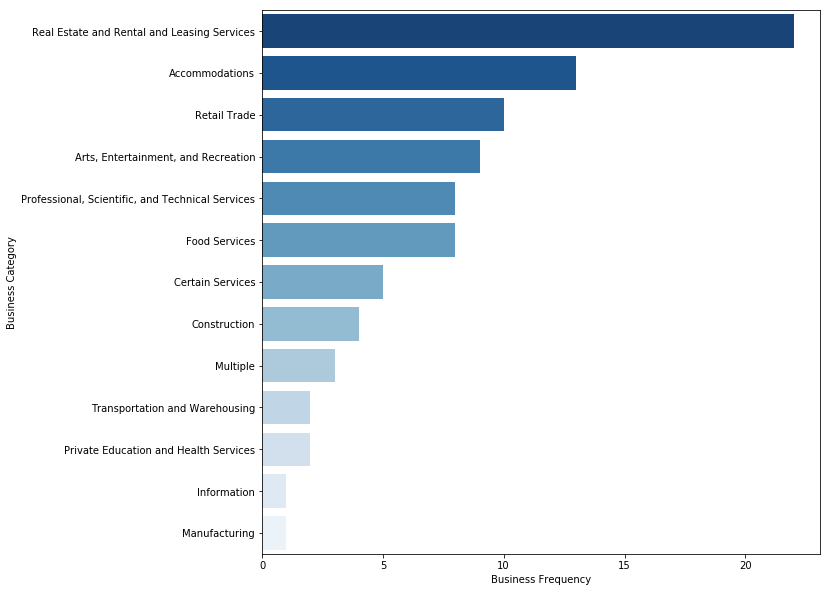

In [169]:
make_bar_plot(business_df['NAICS Code Description'].value_counts(),
             business_df['NAICS Code Description'].value_counts().index,
             'Blues_r',
             'Business Frequency',
             'Business Category')

A majority of the businesses around our store are Real Estate and Rental Services, which doesn't realy affect us much. <br>
What might affect us are the other Food Services in the vicinity.

In [170]:
business_df[business_df['NAICS Code Description'] == 'Food Services']

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
1750,1174864-01-181,1081748,Trevor Logan,Booster Foods,601 Baker St,San Francisco,CA,94117.0,01/01/2018,NaN,...,7220-7229,Food Services,False,False,NaN,NaN,NaN,NaN,NaN,NaN
46570,0379582-02-001,379582,Green Chile Kitchen & Mrkt Llc,Chile Pies & Ice Cream,601 Baker St,San Francisco,CA,94117.0,07/29/2004,NaN,...,7220-7229,Food Services,False,False,H24,"Restaurant Less Than 1,000 Sqft",5.0,Lone Mountain/USF,NaN,"601 BAKER ST\nSan Francisco, CA 94117\n(37.776..."
63563,0412768-01-001,412768,Seoul On Wheels Inc,Seoul On Wheels Inc,1546 Fulton St,San Francisco,CA,94117.0,01/22/2007,NaN,...,7220-7229,Food Services,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,"1546 FULTON ST\nSan Francisco, CA 94117\n(37.7..."
77045,0434710-02-001,434710,Fulton Lounge Inc,Tsunami Panhandle,1302-08 Fulton St,San Francisco,CA,94117.0,05/04/2010,NaN,...,7220-7229,Food Services,False,False,H25,"Restaurant 1,000 - 2,000 Sqft",5.0,Western Addition,NaN,"1302 08 FULTON ST\nSan Francisco, CA 94117\n(3..."
77054,0434710-05-001,434710,Fulton Lounge Inc,Corkage Sake & Wine Shop,1302 Fulton St,San Francisco,CA,94117.0,05/04/2010,NaN,...,7220-7229,Food Services,False,False,NaN,NaN,5.0,Western Addition,NaN,"1302 FULTON ST\nSan Francisco, CA 94117\n(37.7..."
133091,0957227-01-001,957227,Tsunami Panhandle Inc,Cafe Abir,1300 Fulton St,San Francisco,CA,94117.0,12/31/2008,NaN,...,7220-7229,Food Services,False,False,NaN,NaN,5.0,Western Addition,NaN,"1300 FULTON ST\nSan Francisco, CA 94117\n(37.7..."
188044,1141118-03-171,957227,Tsunami Panhandle Inc,Tsunami Panhandle,1300 -1306 Fulton St,San Francisco,CA,94117.0,12/31/2008,NaN,...,7220-7229,Food Services,False,False,NaN,NaN,5.0,Western Addition,NaN,NaN
203420,1157032-08-171,1016399,Ju-Ni Llc,Ju-Ni,1335 Fulton St Ste 101,San Francisco,CA,94117.0,07/24/2015,NaN,...,7220-7229,Food Services,False,False,H24,"Restaurant Less Than 1,000 Sqft",5.0,Hayes Valley,NaN,NaN


In [171]:
business_df[business_df['NAICS Code Description'] == 'Retail Trade']

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
6050,1191355-06-181,1059030,Dy Eric David,Nopa Corner Market,1601 Fulton St,San Francisco,CA,94117.0,10/05/2016,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,NaN,NaN,NaN,NaN
14955,0086356-11-001,86356,Octavend Corp,Stevens Bus Products & Flags,623 Baker St,San Francisco,CA,94117.0,01/01/1975,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,"623 BAKER ST\nSan Francisco, CA 94117\n(37.776..."
46345,0319579-07-001,319579,Terbolizard Elizabeth A,Local Craft,1421 Fulton St,San Francisco,CA,94117.0,03/06/2007,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,5.0,Hayes Valley,NaN,"1421 FULTON ST\nSan Francisco, CA 94117\n(37.7..."
134015,1002906-07-141,358088,Leon Joseph,Jl Designs,430 Baker St 3,San Francisco,CA,94117.0,08/15/2002,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,5.0,Hayes Valley,NaN,"430 BAKER ST\nSAN FRANCISCO, CA 94117\n(37.774..."
148866,1029167-05-151,935760,Courrier Cliff,San Francisco Balloons,533 Baker St,San Francisco,CA,94117.0,11/03/1994,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,"533 BAKER ST\nSAN FRANCISCO, CA 94117\n(37.775..."
179969,1122655-10-161,1059030,Dy Eric David,Nopa Liquors & Deli,1601 Fulton St,San Francisco,CA,94117.0,10/05/2016,NaN,...,4400-4599,Retail Trade,False,False,H73,Deemed Approved Off-Sale Alcohol Use,NaN,NaN,NaN,NaN
188449,0086356-07-001,86356,Octavend Corp,Stevens,623 Baker St,San Francisco,CA,94117.0,01/01/1975,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,"623 BAKER ST\nSan Francisco, CA 94117\n(37.776..."
188450,0086356-08-001,86356,Octavend Corp,The Stevens Flagship,623 Baker St,San Francisco,CA,94117.0,01/01/1975,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,"623 BAKER ST\nSan Francisco, CA 94117\n(37.776..."
188451,0086356-09-001,86356,Octavend Corp,Stevens International,623 Baker St,San Francisco,CA,94117.0,01/01/1975,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,"623 BAKER ST\nSan Francisco, CA 94117\n(37.776..."
188452,0086356-10-001,86356,Octavend Corp,The San Francisco Flag Museum,623 Baker St,San Francisco,CA,94117.0,01/01/1975,NaN,...,4400-4599,Retail Trade,False,False,NaN,NaN,5.0,Lone Mountain/USF,NaN,"623 BAKER ST\nSan Francisco, CA 94117\n(37.776..."


Upon Inspecting the above two dataframes we can make the following observations:
>* All the Food Services are restaurants and would increase the foot traffic around ASIV, and increase it's  popularity
>* In the Retail trade businesses, we can identify a corner store and a Deli, which aren't direct competitors. In fact if these traders receive a significant amount of customers, in certain cases our grocery store can catch the overflow.